### Exploratory Data Analysis - Serena

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("final_sothebys.csv")

In [11]:
df.columns

Index(['Unnamed: 0', 'lot_id', 'auction_id', 'lot_title', 'estimate_low',
       'estimate_high', 'hammer_price_bp', 'currency', 'nth_in_auction',
       'lot_number', 'condition', 'provenance', 'literature',
       'external_image_url', 'auction_house_id', 'auc_title', 'number_of_lots',
       'location', 'start_date', 'auc_desc', 'sale_id', 'artist_id', 'name',
       'birth_year', 'death_year', 'auc_date', 'auc_year', 'auc_month',
       'auc_season', 'is_untitled', 'auc_order', 'estimate_avg',
       'hammer_price_bp_usd', 'estimate_low_usd', 'estimate_high_usd',
       'estimate_avg_usd'],
      dtype='object')

## Some Basic Plots

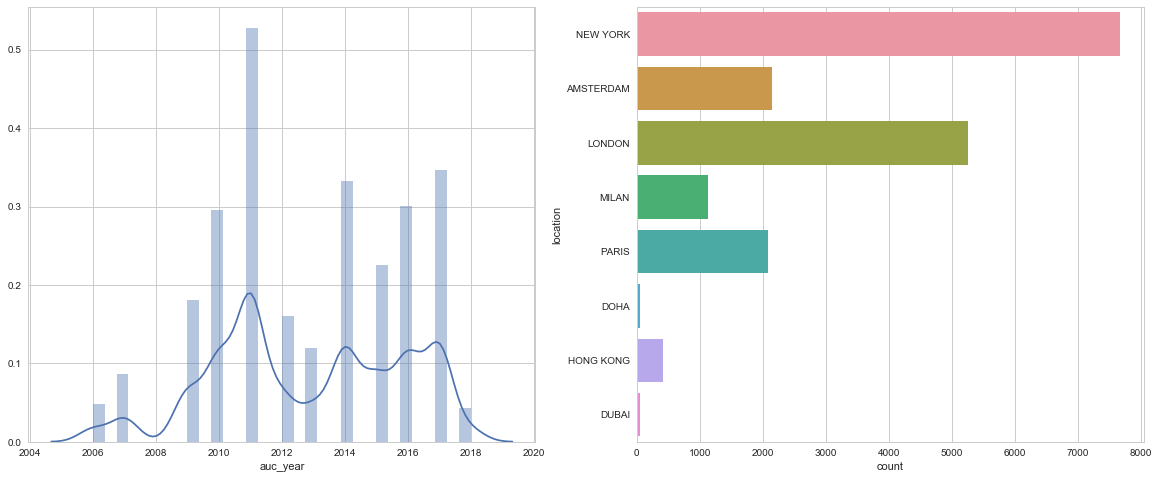

In [9]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.distplot(df.auc_year,ax=axes[0])
sns.countplot(y=df.location,ax=axes[1])

## Is there a correlation between auction type and whether the lot is named as "untitled"?

we can label the top 20 auctions by whether they are contemporary and plot a mosaic plot to see if there is correlation.

In [12]:
#group data by auc_title and add "sum of lots" column
title_grouped=pd.DataFrame({'count' : df.groupby(["auc_title","is_untitled"]).size()}).reset_index()
title_grouped["sum"]=title_grouped["count"].groupby(title_grouped["auc_title"]).transform("sum")
untitled_title=title_grouped.loc[title_grouped["is_untitled"]==1].reset_index()

In [13]:
#calculate ratio of untitled lots within each auc title
untitled_title["ratio"]=untitled_title["count"]/untitled_title["sum"]
untitled_title.sort_values(by=['ratio'],ascending=False,inplace=True)
untitled_title.reset_index(inplace=True)

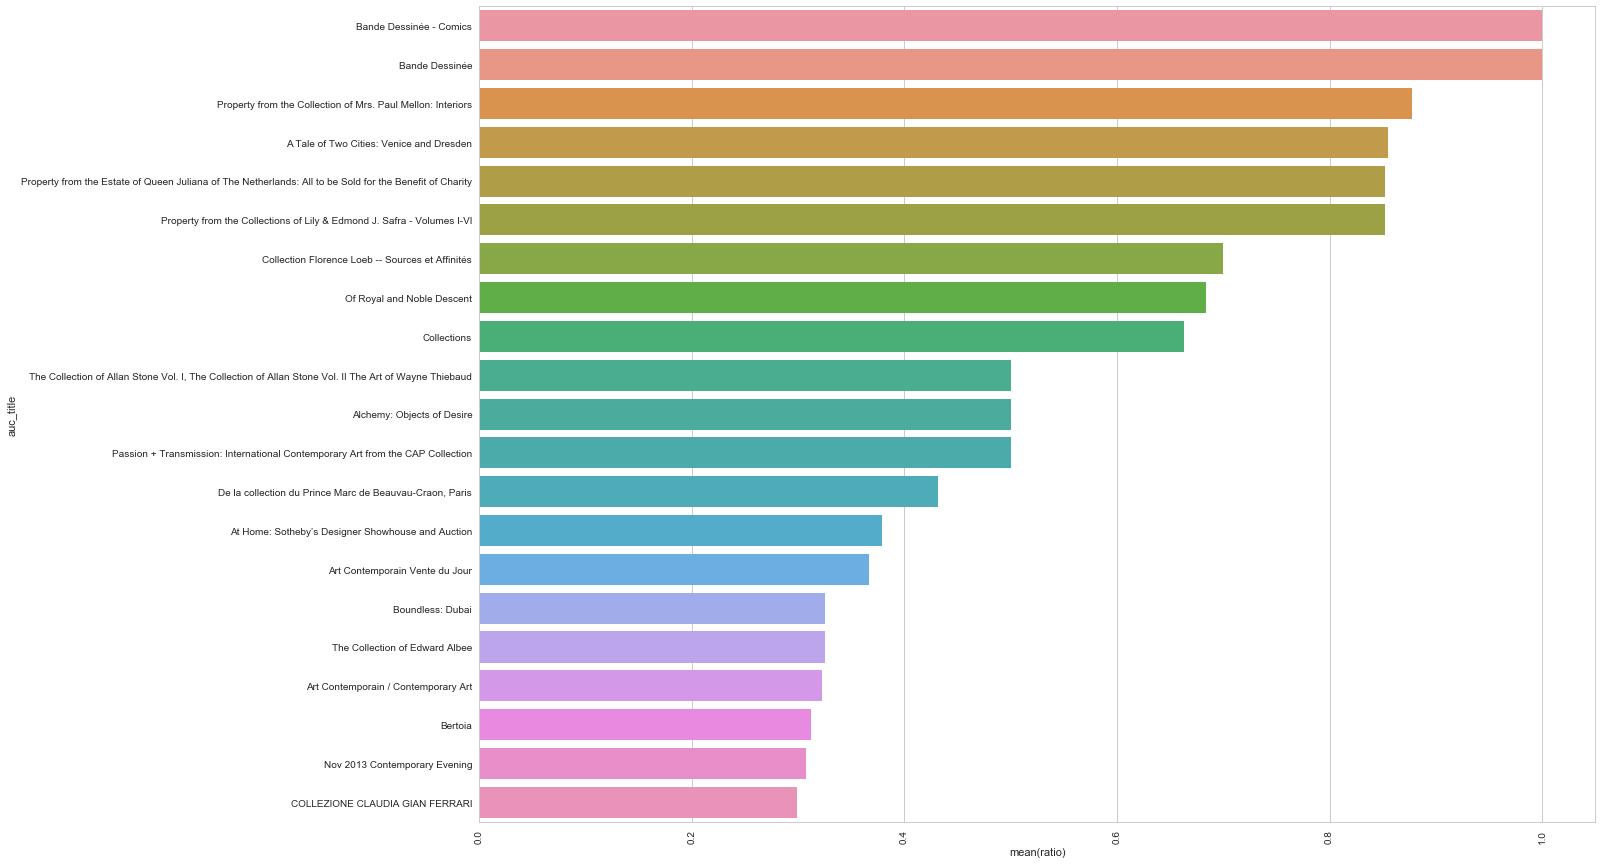

In [14]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.barplot(y="auc_title", x="ratio", data=untitled_title.loc[:20,]);
plt.xticks(rotation=90);

### Does the Artist's era matter to the hammer price/estimate? Older work is more valuable?

[None]

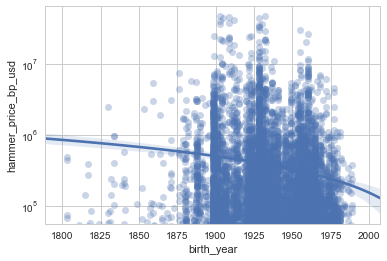

In [34]:
temp=df.loc[(df.birth_year>1800)&(df.birth_year<2000)]
ax=sns.regplot(x="birth_year", y="hammer_price_bp_usd", data=temp, scatter_kws={'alpha':0.3})
ax.set(yscale="log")

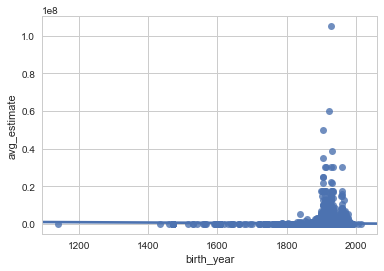

In [73]:
ax=sns.regplot(x="birth_year", y="avg_estimate", data=temp)

### Do Order matter to the hammer price/estimates?

[None]

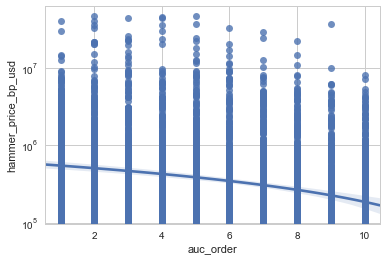

In [37]:
ax=sns.regplot(x="auc_order", y="hammer_price_bp_usd", data=temp)
ax.set(yscale="log")

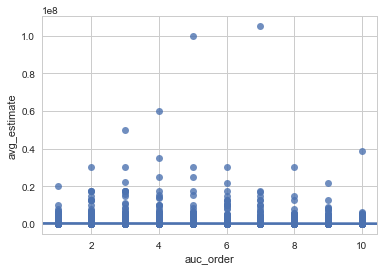

In [75]:
ax=sns.regplot(x="auc_order", y="avg_estimate", data=df)

#### Some interesting stats:

In [23]:
#percent of unsold lots
#df[df.hammer_price_bp<df.estimate_low].shape
1449/22711

0.06380168200431509

In [24]:
#percentage of NAs in lot_title
3901/22711

0.17176698516137553